In [1]:
# Importing the libraries needed for this assignment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator

# Importing all the datasets
polyclinicAttendancesWeekly = pd.read_csv('../DAAA1B07-2341475-ChoyJeeHungCaleb/Datasets/AverageDailyPolyclinicAttendancesforSelectedDiseases.csv')
surfaceTemperatureMonthly = pd.read_csv('../DAAA1B07-2341475-ChoyJeeHungCaleb/Datasets/SurfaceAirTemperatureMonthlyMean.csv')
rainfallTotalMonthly = pd.read_csv('../DAAA1B07-2341475-ChoyJeeHungCaleb/Datasets/RainfallMonthlyTotal.csv')
relativeHumidityMonthly = pd.read_csv('../DAAA1B07-2341475-ChoyJeeHungCaleb/Datasets/RelativeHumidityMonthlyMean.csv')
sunshineDurationMonthly = pd.read_csv('../DAAA1B07-2341475-ChoyJeeHungCaleb/Datasets/SunshineDurationMonthlyMeanDailyDuration.csv')

In [2]:
# FUNCTIONS DEFINED

# Function to extract the first and last (num_rows) of the dataframe and print it out
def display_head_tail(dataframe, num_rows=5):

    # Parameters:
    # - dataframe (pd.DataFrame): The input DataFrame
    # - num_rows (int): Number of rows to display for both head and tail. Default is 5
    
    head_data = dataframe.head(num_rows)
    tail_data = dataframe.tail(num_rows)

    print(f'The first {num_rows} rows of the dataset are shown below:\n', head_data)
    print(f'\nThe last {num_rows} rows of the dataset are shown below:\n', tail_data)
    print('')

# Function to extract the number of rows and columns of a dataframe
def display_dataframe_shape(dataframe):

    # Parameters:
    # - dataframe (pd.DataFrame): The input DataFrame
    
    rows, columns = dataframe.shape
    print(f'\nThere is a total of {rows} rows and {columns} columns in this dataset.')
    print('')

# Function to extract the column names of the dataframe and print it out
def display_dataframe_columns(dataframe):

    # Parameters:
    # - dataframe (pd.DataFrame): The input DataFrame.

    columns_names = dataframe.columns
    print("\nThe Column names are:")
    for column in columns_names:
        print(f"- {column}")
    print('')

# Function to extract the datatypes of the columns and print it out
def display_dataframe_data_types(dataframe):

    # Parameters:
    # - dataframe (pd.DataFrame): The input DataFrame.

    column_data_types = dataframe.dtypes
    for column_name, data_type in column_data_types.items():
        print(f'The data type of column "{column_name}" is {data_type}.')
    print('')    

# Function to extract the number of non-NaN values in each column and print it out
def display_non_nan_counts(dataframe):

    # Parameters:
    # - dataframe (pd.DataFrame): The input DataFrame.
    
    column_value_counts = dataframe.count()
    for column_name, value_count in column_value_counts.items():
        print(f'The number of non-NaN values in column "{column_name}" is {value_count}.')
    print('')

# Extracts the total number of NaN values in each column and print it out
def display_nan_counts(dataframe):

    # Parameters:
    # - dataframe (pd.DataFrame): The input DataFrame.
    
    nan_values = dataframe.isna()
    total_nan_values_per_column = nan_values.sum()
    for column_name, total_nan_values in total_nan_values_per_column.items():
        print(f'The total number of NaN values in column "{column_name}" is {total_nan_values}.')
    print('')

# Extract the minimum and maximum values of a specified column and print it out with its month and unit
def describe_min_max_values(dataframe, column_name, value_unit):

    # Parameters:
    # - dataframe (pd.DataFrame): The input DataFrame.
    # - column_name (str): The name of the column for which to find min and max values.
    # - value_unit (str): The unit of the values in the specified column.

    min_row = dataframe.loc[dataframe[column_name].idxmin()]
    max_row = dataframe.loc[dataframe[column_name].idxmax()]
    
    min_sentence = f"The minimum {column_name} ({min_row[column_name]:.2f} {value_unit}) occurred in {min_row['month']}."
    max_sentence = f"The maximum {column_name} ({max_row[column_name]:.2f} {value_unit}) occurred in {max_row['month']}."

    print(min_sentence)
    print(max_sentence)
    print('')

# Function to extract the statistic summary of a specified column and print it out
def print_column_stats(df, column_name):
    # Describe the specified column
    column_stats = df[column_name].describe()

    # Print the statistics summary in the form of a list
    output_list = [
        f"The statistics summary of the {column_name} is:",
        f"Count of the {column_name} column is: {column_stats['count']}",
        f"Mean of the {column_name} column is: {column_stats['mean']}",
        f"Std of the {column_name} column is: {column_stats['std']}",
        f"Min of the {column_name} column is: {column_stats['min']}",
        f"25% of the {column_name} column is: {column_stats['25%']}",
        f"50% of the {column_name} column is: {column_stats['50%']}",
        f"75% of the {column_name} column is: {column_stats['75%']}",
        f"Max of the {column_name} column is: {column_stats['max']}"
    ]

    # Print each item in the list
    for item in output_list:
        print(item)
    print('')

# Function to extract the info of a dataframe and print it out
def display_dataframe_info(dataframe):

    # Parameters:
    # - dataframe (pd.DataFrame): The input DataFrame.
    
    print('\nInfo of the dataset:')
    print(dataframe.info())        
    print('')

# Function to reduce the month range of a DataFrame based on specified start and end dates.
def reduce_month_range(dataframe, start_date, end_date):

    # Parameters:
    # - dataframe (pd.DataFrame): The input DataFrame.
    # - start_date (str): The start date in 'YYYY-MM' format.
    # - end_date (str): The end date in 'YYYY-MM' format.

    # Returns:
    # - pd.DataFrame: The subset of the DataFrame within the specified date range.
   
    # Convert the 'month' column to datetime format
    dataframe['month'] = pd.to_datetime(dataframe['month'])

    # Extract the year and month from the 'month' column and create a new column
    dataframe['year_month'] = dataframe['month'].dt.to_period('M')

    # Set the 'year_month' column as the index
    dataframe.set_index('year_month', inplace=True)

    # Create a copy of the DataFrame using the copy() method
    dataframe_subset = dataframe.loc[start_date:end_date].copy()

    # Reset the index and drop the 'year_month' column if needed
    dataframe_subset.reset_index(inplace=True)
    dataframe_subset.drop(columns=['year_month'], inplace=True)

    # Convert the 'month' column to datetime format
    dataframe_subset['month'] = pd.to_datetime(dataframe_subset['month'])

    # Extract the year and month from the datetime and update the 'month' column
    dataframe_subset['month'] = dataframe_subset['month'].dt.to_period('M')

    return dataframe_subset    

def plot_dual_axis_line_graph(df1, x_col1, y_col1, df2, x_col2, y_col2, title='',
                               color1='tab:blue', marker1='o', linestyle1='-', markersize1=3,
                               color2='tab:red', marker2='x', linestyle2='-', markersize2=3,
                               xlabel='Month', ylabel1=None, ylabel2=None):

    # Parameters:
    # - df1: First DataFrame
    # - x_col1: Column name for x-axis in df1
    # - y_col1: Column name for y-axis in df1
    # - df2: Second DataFrame
    # - x_col2: Column name for x-axis in df2
    # - y_col2: Column name for y-axis in df2
    # - title: Title of the plot (default is an empty string)
    # - color1: Color for the line graph of df1 (default is 'tab:blue')
    # - marker1: Marker style for the line graph of df1 (default is 'o')
    # - linestyle1: Linestyle for the line graph of df1 (default is '-')
    # - markersize1: Marker size for the line graph of df1 (default is 3)
    # - color2: Color for the line graph of df2 (default is 'tab:red')
    # - marker2: Marker style for the line graph of df2 (default is 'x')
    # - linestyle2: Linestyle for the line graph of df2 (default is '-')
    # - markersize2: Marker size for the line graph of df2 (default is 3)
    # - xlabel: Label for the x-axis (default is 'Month')
    # - ylabel1: Label for the y-axis of the first plot (default is None)
    # - ylabel2: Label for the y-axis of the second plot (default is None)

    # Sort DataFrames by the specified x-columns
    df1 = df1.sort_values(by=x_col1)
    df2 = df2.sort_values(by=x_col2)

    # Convert 'Period' objects to 'Timestamp' for plotting
    df1[x_col1] = df1[x_col1].astype(str) + '-01'
    df1[x_col1] = pd.to_datetime(df1[x_col1])

    df2[x_col2] = df2[x_col2].astype(str) + '-01'
    df2[x_col2] = pd.to_datetime(df2[x_col2])

    # Plotting the line graph for df1
    fig, ax2 = plt.subplots(figsize=(10, 6))

    ax2.set_xlabel(xlabel)
    ax2.set_ylabel(ylabel1 or y_col1, color=color1)
    ax2.plot(df1[x_col1], df1[y_col1], marker=marker1, linestyle=linestyle1, markersize=markersize1, color=color1)
    ax2.tick_params(axis='y', labelcolor=color1)

    # Creating a secondary y-axis for df2
    ax1 = ax2.twinx()
    ax1.set_ylabel(ylabel2 or y_col2, color=color2)
    ax1.plot(df2[x_col2], df2[y_col2], marker=marker2, linestyle=linestyle2, markersize=markersize2, color=color2)
    ax1.tick_params(axis='y', labelcolor=color2)

    # Set the x-axis ticks to show every year
    ax2.xaxis.set_major_locator(YearLocator())

    # Adding labels and title
    plt.title(title)

    # Adding grid (optional)
    plt.grid(True)

    # Show the plot
    plt.show()

#### Dataset information:
***
Links:
- Average Weekly Polyclinic Attendances for Selected Diseases: https://beta.data.gov.sg/collections/476/view
- Surface Air Temperature - Monthly Mean: https://beta.data.gov.sg/collections/1419/view
- Rainfall - Monthly Total: https://beta.data.gov.sg/collections/1399/view
- Relative Humidity - Monthly Mean: https://beta.data.gov.sg/collections/1404/view
- Sunshine Duration- Monthly Mean Daily Duration: https://beta.data.gov.sg/collections/1417/view<br>

Notes:<br>
Since the "Average Weekly Polyclinic Attendances for Selected Diseases" is from year 2012 to year 2022, we will need to use a subset of the data from the other datasets used such that the timeframe would be identical.<br>
Since the "Average Weekly Polyclinic Attendances for Selected Diseases" is using weeks instead of months, we will need to convert the weeks into months such that the comparison would be equal.
***

### Analysis of the average weekly polyclinic attendances for selected diseases dataset

In [3]:
# ANALYSIS OF THE AVERAGE WEEKLY POLYCLINIC ATTENDANCES FOR SELECTED DISEASES DATASET
print('*** Average Weekly Polyclinic Attendances For Selected Diseases ***\n')

# Describe the first & last 5 rows of the dataset
display_head_tail(polyclinicAttendancesWeekly)

# Describe the number of columns and rows in the dataset
display_dataframe_shape(polyclinicAttendancesWeekly)

# Describe the columns
display_dataframe_columns(polyclinicAttendancesWeekly)

# Describe the columns and their datatypes
display_dataframe_data_types(polyclinicAttendancesWeekly)

# Describe the number of non-NaN values
display_non_nan_counts(polyclinicAttendancesWeekly)

# Describe the info on the dataframe
display_dataframe_info(polyclinicAttendancesWeekly)

*** Average Weekly Polyclinic Attendances For Selected Diseases ***

The first 5 rows of the dataset are shown below:
    epi_week                                   disease  no._of_cases
0  2012-W01  Acute Upper Respiratory Tract infections          2932
1  2012-W01                      Acute Conjunctivitis           120
2  2012-W01                           Acute Diarrhoea           491
3  2012-W01                                Chickenpox            18
4  2012-W02  Acute Upper Respiratory Tract infections          3189

The last 5 rows of the dataset are shown below:
       epi_week                                   disease  no._of_cases
2552  2022-W52  Acute Upper Respiratory Tract infections          2336
2553  2022-W52                      Acute Conjunctivitis            64
2554  2022-W52                           Acute Diarrhoea           320
2555  2022-W52                                Chickenpox             7
2556  2022-W52                                      HFMD            

***
From analysis of the average weekly polyclinic attendances for selected diseases dataset, we realize that the dataset is in a weekly format not a monthly format. Therefore, we will convert the weeks into months in a new dataset.
***

### Converting the dataset from a weekly format into a monthly format

In [4]:
# CONVERTING THE DATASET FROM A WEEKLY FORMAT INTO A MONTHLY FORMAT

# Copying the dataset such that the original dataset is not affected
copied_polyclinicAttendancesWeekly = polyclinicAttendancesWeekly.copy()

# Convert epi_week to datetime format in the copied dataframe
copied_polyclinicAttendancesWeekly['epi_week'] = pd.to_datetime(copied_polyclinicAttendancesWeekly['epi_week'] + '-1', format='%Y-W%U-%w')

# Extract year and month from epi_week and create a new 'month' column
copied_polyclinicAttendancesWeekly['month'] = copied_polyclinicAttendancesWeekly['epi_week'].dt.to_period('M')

# Group by 'month' and 'disease', summing up the 'no._of_cases'
grouped_data = copied_polyclinicAttendancesWeekly.groupby(['month', 'disease'])['no._of_cases'].sum().reset_index()

# Pivot the table to get the desired format
result = pd.pivot_table(grouped_data, values='no._of_cases', index='month', columns='disease', fill_value=None).reset_index()

# Rename columns for consistency with the provided format
result.columns.name = None
result.rename(columns={'month': 'epi_month'}, inplace=True)

# Reshape the dataframe to match the desired format
result_melted = result.melt(id_vars='epi_month', var_name='disease', value_name='no._of_cases')

# Sort the values by month and reset the index
polyclinicAttendancesMonthly = result_melted.sort_values(['epi_month', 'disease']).reset_index(drop=True)

# Print the result to check if it is done correctly
print('The updated dataset from weekly into months format:')
print(polyclinicAttendancesMonthly)

The updated dataset from weekly into months format:
    epi_month                                   disease  no._of_cases
0     2012-01                      Acute Conjunctivitis         568.0
1     2012-01                           Acute Diarrhoea        2779.0
2     2012-01  Acute Upper Respiratory Tract infections       16663.0
3     2012-01                                Chickenpox          95.0
4     2012-01                                      HFMD           NaN
..        ...                                       ...           ...
655   2022-12                      Acute Conjunctivitis         229.0
656   2022-12                           Acute Diarrhoea        1326.0
657   2022-12  Acute Upper Respiratory Tract infections        8585.0
658   2022-12                                Chickenpox          21.0
659   2022-12                                      HFMD          58.0

[660 rows x 3 columns]


### Analysis of the average monthly polyclinic attendances for selected diseases dataset (with NaN values)

In [5]:
# ANALYSIS OF THE AVERAGE MONTHLY POLYCLINIC ATTENDANCES FOR SELECTED DISEASES DATASET THAT WAS CREATED ABOVE

print('*** Average Monthly Polyclinic Attendances For Selected Diseases ***\n')

# Describe the first & last 5 rows of the dataset
display_head_tail(polyclinicAttendancesMonthly)

# Describe the number of columns and rows in the dataset
display_dataframe_shape(polyclinicAttendancesMonthly)

# Describe the columns
display_dataframe_columns(polyclinicAttendancesMonthly)

# Describe the columns and their datatypes
display_dataframe_data_types(polyclinicAttendancesMonthly)

# Describe the number of non-NaN values
display_non_nan_counts(polyclinicAttendancesMonthly)

# Check for NaN values in the DataFrame
display_nan_counts(polyclinicAttendancesMonthly)

# Describe the sum of the 'no._of_cases' for each disease
total_cases_per_disease = polyclinicAttendancesWeekly.groupby('disease')['no._of_cases'].sum()
for disease, total_cases in total_cases_per_disease.items():
    print(f'The total number of cases for "{disease}" is {total_cases}.')    
print('')

# Describe the minimum and maximum values of each disease and the corresponding epi_month
min_max_values_per_disease = polyclinicAttendancesMonthly.groupby('disease')['no._of_cases'].agg([('min_value', 'idxmin'), ('max_value', 'idxmax'), ('min', 'min'), ('max', 'max')])
for disease, values in min_max_values_per_disease.iterrows():
    min_month = polyclinicAttendancesMonthly.loc[values['min_value'], 'epi_month']
    max_month = polyclinicAttendancesMonthly.loc[values['max_value'], 'epi_month']
    min_value = values['min']
    max_value = values['max']
    print(f'For "{disease}": Minimum value ({min_value}) occurred in {min_month}, Maximum value ({max_value}) occurred in {max_month}.')
print('')

# Describe the summary statistics of the dataframe
describe_per_disease = polyclinicAttendancesMonthly.groupby('disease')['no._of_cases'].describe()
for disease, describe_info in describe_per_disease.iterrows():
    print(f"Statistics for '{disease}':")
    print(describe_info)
    print('\n' + '='*50 + '\n')
print('')

# Describe the info on the dataframe
display_dataframe_info(polyclinicAttendancesMonthly)


*** Average Monthly Polyclinic Attendances For Selected Diseases ***

The first 5 rows of the dataset are shown below:
   epi_month                                   disease  no._of_cases
0   2012-01                      Acute Conjunctivitis         568.0
1   2012-01                           Acute Diarrhoea        2779.0
2   2012-01  Acute Upper Respiratory Tract infections       16663.0
3   2012-01                                Chickenpox          95.0
4   2012-01                                      HFMD           NaN

The last 5 rows of the dataset are shown below:
     epi_month                                   disease  no._of_cases
655   2022-12                      Acute Conjunctivitis         229.0
656   2022-12                           Acute Diarrhoea        1326.0
657   2022-12  Acute Upper Respiratory Tract infections        8585.0
658   2022-12                                Chickenpox          21.0
659   2022-12                                      HFMD          58.0




***
From analysis of the average monthly polyclinic attendances for selected diseases dataset (with NaN values), we realize that the dataset contains missing(NaN) values. Therefore, we will fill it up with the mean of the respective disease. Eg. NaN values in HFMD will only be filled with mean value of HFMD.
***

### Resolving NaN values

In [6]:
# HANDLING THE MISSING (NaN) VALUES IN THE AVERAGE MONTHLY POLYCLINIC ATTENDANCES FOR SELECTED DISEASES DATASET

# Handling the NaN values by filling it with the mean values by its respective disease
polyclinicAttendancesMonthly['no._of_cases'] = polyclinicAttendancesMonthly.groupby('disease')['no._of_cases'].transform(lambda x: x.fillna(round(x.mean())))

### Analysis of the average monthly polyclinic attendances for selected diseases dataset without NaN values

In [7]:
# ANALYSIS OF THE AVERAGE MONTHLY POLYCLINIC ATTENDANCES FOR SELECTED DISEASES DATASET WITHOUT NaN VALUES

print('*** Average Weekly Polyclinic Attendances For Selected Diseases ***\n')

# Describe the first & last 5 rows of the dataset
display_head_tail(polyclinicAttendancesMonthly)

# Describe the number of columns and rows in the dataset
display_dataframe_shape(polyclinicAttendancesMonthly)

# Describe the columns
display_dataframe_columns(polyclinicAttendancesMonthly)

# Describe the columns and their datatypes
display_dataframe_data_types(polyclinicAttendancesMonthly)

# Describe the number of non-NaN values
display_non_nan_counts(polyclinicAttendancesMonthly)

# Check for NaN values in the DataFrame
display_nan_counts(polyclinicAttendancesMonthly)

# Describe the sum of the 'no._of_cases' for each disease
total_cases_per_disease = polyclinicAttendancesWeekly.groupby('disease')['no._of_cases'].sum()
for disease, total_cases in total_cases_per_disease.items():
    print(f'The total number of cases for "{disease}" is {total_cases}.')    
print('')

# Describe the minimum and maximum values of each disease and the corresponding epi_month
min_max_values_per_disease = polyclinicAttendancesMonthly.groupby('disease')['no._of_cases'].agg([('min_value', 'idxmin'), ('max_value', 'idxmax'), ('min', 'min'), ('max', 'max')])
for disease, values in min_max_values_per_disease.iterrows():
    min_month = polyclinicAttendancesMonthly.loc[values['min_value'], 'epi_month']
    max_month = polyclinicAttendancesMonthly.loc[values['max_value'], 'epi_month']
    min_value = values['min']
    max_value = values['max']
    print(f'For "{disease}": Minimum value ({min_value}) occurred in {min_month}, Maximum value ({max_value}) occurred in {max_month}.')
print('')

# Describe the summary statistics of the dataframe
describe_per_disease = polyclinicAttendancesMonthly.groupby('disease')['no._of_cases'].describe()
for disease, describe_info in describe_per_disease.iterrows():
    print(f"Statistics for '{disease}':")
    print(describe_info)
    print('\n' + '='*50 + '\n')
print('')

# Describe the info on the dataframe
display_dataframe_info(polyclinicAttendancesMonthly)



*** Average Weekly Polyclinic Attendances For Selected Diseases ***

The first 5 rows of the dataset are shown below:
   epi_month                                   disease  no._of_cases
0   2012-01                      Acute Conjunctivitis         568.0
1   2012-01                           Acute Diarrhoea        2779.0
2   2012-01  Acute Upper Respiratory Tract infections       16663.0
3   2012-01                                Chickenpox          95.0
4   2012-01                                      HFMD          56.0

The last 5 rows of the dataset are shown below:
     epi_month                                   disease  no._of_cases
655   2022-12                      Acute Conjunctivitis         229.0
656   2022-12                           Acute Diarrhoea        1326.0
657   2022-12  Acute Upper Respiratory Tract infections        8585.0
658   2022-12                                Chickenpox          21.0
659   2022-12                                      HFMD          58.0


T

### Converting the average monthly polyclinic attendances for selected diseases dataset into a average monthly polyclinic attendances total dataset

In [8]:
# Make a copy of the DataFrame
polyclinic_copy = polyclinicAttendancesMonthly.copy()

# Group by 'epi_month' and sum the 'no._of_cases' for each month
polyclinicAttendancesMonthly_total_cases_per_year_month = polyclinic_copy.groupby('epi_month')['no._of_cases'].sum()

# Rename the column heading
polyclinicAttendancesMonthly_total_cases_per_year_month = polyclinicAttendancesMonthly_total_cases_per_year_month.reset_index().rename(columns={'no._of_cases': 'total_cases'})

# Display the result
print('The total number of cases each month per year:')
print(polyclinicAttendancesMonthly_total_cases_per_year_month)

The total number of cases each month per year:
    epi_month  total_cases
0     2012-01      20161.0
1     2012-02      14859.0
2     2012-03      13445.0
3     2012-04      18387.0
4     2012-05      14366.0
..        ...          ...
127   2022-08      14117.0
128   2022-09      11422.0
129   2022-10      17554.0
130   2022-11      10294.0
131   2022-12      10219.0

[132 rows x 2 columns]


### Converting the average monthly polyclinic attendances for selected diseases dataset into a average monthly polyclinic attendances total dataset after adding all each respective months across all years together

In [9]:
# Create a copy of the original DataFrame
processed_data = polyclinicAttendancesMonthly.copy()

# Extract month and year from 'epi_month'
processed_data['month'] = processed_data['epi_month'].dt.month

# Group by 'month' and sum the 'no._of_cases' for each month
polyclinicAttendancesMonthly_total_cases_per_month = processed_data.groupby('month')['no._of_cases'].sum().reset_index()

# Rename the column heading
polyclinicAttendancesMonthly_total_cases_per_month = polyclinicAttendancesMonthly_total_cases_per_month.rename(columns={'month': 'Month', 'no._of_cases': 'Total Cases'})

# Display the result
print('The total number of cases per month across all years:')
print(polyclinicAttendancesMonthly_total_cases_per_month)

The total number of cases per month across all years:
    Month  Total Cases
0       1     170688.0
1       2     163867.0
2       3     142092.0
3       4     142724.0
4       5     145768.0
5       6     127135.0
6       7     156815.0
7       8     143791.0
8       9     131961.0
9      10     144783.0
10     11     132679.0
11     12     136025.0


### Analysis of the surface air temperature monthly mean dataset

In [10]:
# ANALYSIS OF THE SURFACE AIR TEMPERATURE MONTHLY MEAN DATASET

print('*** Surface Air Temperature Monthly Mean ***\n')

# Describe the first & last 5 rows of the dataset
display_head_tail(surfaceTemperatureMonthly)

# Describe the number of columns and rows in the dataset
display_dataframe_shape(surfaceTemperatureMonthly)

# Describe the columns
display_dataframe_columns(surfaceTemperatureMonthly)

# Describe the columns and their datatypes
display_dataframe_data_types(surfaceTemperatureMonthly)

# Describe the number of non-NaN values
display_non_nan_counts(surfaceTemperatureMonthly)

# Check for NaN values in the DataFrame
display_nan_counts(surfaceTemperatureMonthly)

# Describe the minimum and maximum values of the temperature and the corresponding month
describe_min_max_values(surfaceTemperatureMonthly, 'mean_temp', '°C')

# # Describe the summary statistics of the dataframe
print_column_stats(surfaceTemperatureMonthly, 'mean_temp')

# Describe the info on the dataframe
display_dataframe_info(surfaceTemperatureMonthly)

*** Surface Air Temperature Monthly Mean ***

The first 5 rows of the dataset are shown below:
      month  mean_temp
0  1982-01       25.9
1  1982-02       27.1
2  1982-03       27.2
3  1982-04       27.0
4  1982-05       28.0

The last 5 rows of the dataset are shown below:
        month  mean_temp
496  2023-05       29.5
497  2023-06       29.0
498  2023-07       28.7
499  2023-08       28.7
500  2023-09       28.7


There is a total of 501 rows and 2 columns in this dataset.


The Column names are:
- month
- mean_temp

The data type of column "month" is object.
The data type of column "mean_temp" is float64.

The number of non-NaN values in column "month" is 501.
The number of non-NaN values in column "mean_temp" is 501.

The total number of NaN values in column "month" is 0.
The total number of NaN values in column "mean_temp" is 0.

The minimum mean_temp (25.40 °C) occurred in 1983-12.
The maximum mean_temp (29.50 °C) occurred in 1998-03.

The statistics summary of the mean_temp 

***
From analysis of the surface air temperature monthly mean dataset, we realize that the timeframe of the dataset is too large. The period of time we are looking for is from the year 2012 to the year 2022. Therefore, we will need to subset the dataset for the time range of 2012-01 to 2022-12.
***

### Reducing the time range of the surface air temperature monthly mean dataset

In [11]:
# REDUCING THE MONTH RANGE OF THE DATASET

surfaceTemperatureMonthlySubset = reduce_month_range(surfaceTemperatureMonthly, '2012-01', '2022-12')
print('The updated dataset within the specified date range:')
print(surfaceTemperatureMonthlySubset)

The updated dataset within the specified date range:
       month  mean_temp
0    2012-01       26.7
1    2012-02       27.2
2    2012-03       27.0
3    2012-04       27.6
4    2012-05       28.2
..       ...        ...
127  2022-08       28.1
128  2022-09       27.9
129  2022-10       27.6
130  2022-11       27.4
131  2022-12       26.8

[132 rows x 2 columns]


### Analysis of the edited surface air temperature monthly mean dataset

In [12]:
# ANALYSIS OF THE EDITED SURFACE AIR TEMPERATURE MONTHLY MEAN DATASET

print('*** Surface Air Temperature Monthly Mean  ***\n')

# Describe the first & last 5 rows of the dataset
display_head_tail(surfaceTemperatureMonthlySubset)

# Describe the number of columns and rows in the dataset
display_dataframe_shape(surfaceTemperatureMonthlySubset)

# Describe the columns
display_dataframe_columns(surfaceTemperatureMonthlySubset)

# Describe the columns and their datatypes
display_dataframe_data_types(surfaceTemperatureMonthlySubset)

# Describe the number of non-NaN values
display_non_nan_counts(surfaceTemperatureMonthlySubset)

# Check for NaN values in the DataFrame
display_nan_counts(surfaceTemperatureMonthlySubset)

# Describe the minimum and maximum values of the temperature and the corresponding month
describe_min_max_values(surfaceTemperatureMonthlySubset, 'mean_temp', '°C')

# # Describe the summary statistics of the dataframe
print_column_stats(surfaceTemperatureMonthlySubset, 'mean_temp')

# Describe the info on the dataframe
display_dataframe_info(surfaceTemperatureMonthlySubset)


*** Surface Air Temperature Monthly Mean  ***

The first 5 rows of the dataset are shown below:
      month  mean_temp
0  2012-01       26.7
1  2012-02       27.2
2  2012-03       27.0
3  2012-04       27.6
4  2012-05       28.2

The last 5 rows of the dataset are shown below:
        month  mean_temp
127  2022-08       28.1
128  2022-09       27.9
129  2022-10       27.6
130  2022-11       27.4
131  2022-12       26.8


There is a total of 132 rows and 2 columns in this dataset.


The Column names are:
- month
- mean_temp

The data type of column "month" is period[M].
The data type of column "mean_temp" is float64.

The number of non-NaN values in column "month" is 132.
The number of non-NaN values in column "mean_temp" is 132.

The total number of NaN values in column "month" is 0.
The total number of NaN values in column "mean_temp" is 0.

The minimum mean_temp (26.00 °C) occurred in 2021-01.
The maximum mean_temp (29.40 °C) occurred in 2016-04.

The statistics summary of the mean_t

### Analysis of the rainfall monthly total dataset

In [13]:
# ANALYSIS OF THE RAINFALL MONTHLY TOTAL DATASET

print('*** Rainfall Monthly Total ***\n')

# Describe the first & last 5 rows of the dataset
display_head_tail(rainfallTotalMonthly)

# Describe the number of columns and rows in the dataset
display_dataframe_shape(rainfallTotalMonthly)

# Describe the columns
display_dataframe_columns(rainfallTotalMonthly)

# Describe the columns and their datatypes
display_dataframe_data_types(rainfallTotalMonthly)

# Describe the number of non-NaN values
display_non_nan_counts(rainfallTotalMonthly)

# Check for NaN values in the DataFrame
display_nan_counts(rainfallTotalMonthly)

# Describe the minimum and maximum values of the total rainfall and the corresponding month
describe_min_max_values(rainfallTotalMonthly, 'total_rainfall', 'mm')

# # Describe the summary statistics of the dataframe
print_column_stats(rainfallTotalMonthly, 'total_rainfall')

# Describe the info on the dataframe
display_dataframe_info(rainfallTotalMonthly)

*** Rainfall Monthly Total ***

The first 5 rows of the dataset are shown below:
      month  total_rainfall
0  1982-01           107.1
1  1982-02            27.8
2  1982-03           160.8
3  1982-04           157.0
4  1982-05           102.2

The last 5 rows of the dataset are shown below:
        month  total_rainfall
496  2023-05           112.8
497  2023-06           228.4
498  2023-07           158.0
499  2023-08           114.0
500  2023-09           133.0


There is a total of 501 rows and 2 columns in this dataset.


The Column names are:
- month
- total_rainfall

The data type of column "month" is object.
The data type of column "total_rainfall" is float64.

The number of non-NaN values in column "month" is 501.
The number of non-NaN values in column "total_rainfall" is 501.

The total number of NaN values in column "month" is 0.
The total number of NaN values in column "total_rainfall" is 0.

The minimum total_rainfall (0.20 mm) occurred in 2014-02.
The maximum total_rainfal

***
From analysis of the rainfall monthly total dataset, we realize that the timeframe of the dataset is too large. The period of time we are looking for is from the year 2012 to the year 2022. Therefore, we will need to subset the dataset for the time range of 2012-01 to 2022-12.
***

### Reducing the time range of the rainfall monthly total dataset

In [14]:
# REDUCING THE MONTH RANGE OF THE DATASET

rainfallTotalMonthlySubset = reduce_month_range(rainfallTotalMonthly, '2012-01', '2022-12')
print('The updated dataset within the specified date range:')
print(rainfallTotalMonthlySubset)

The updated dataset within the specified date range:
       month  total_rainfall
0    2012-01           106.1
1    2012-02            83.6
2    2012-03           313.4
3    2012-04           260.6
4    2012-05           292.0
..       ...             ...
127  2022-08           141.4
128  2022-09           121.0
129  2022-10           279.0
130  2022-11           313.8
131  2022-12           215.4

[132 rows x 2 columns]


### Analysis of the edited rainfall monthly total dataset

In [15]:
# ANALYSIS OF THE EDITED RAINFALL MONTHLY TOTAL DATASET

print('*** Rainfall Monthly Total ***\n')

# Describe the first & last 5 rows of the dataset
display_head_tail(rainfallTotalMonthlySubset)

# Describe the number of columns and rows in the dataset
display_dataframe_shape(rainfallTotalMonthlySubset)

# Describe the columns
display_dataframe_columns(rainfallTotalMonthlySubset)

# Describe the columns and their datatypes
display_dataframe_data_types(rainfallTotalMonthlySubset)

# Describe the number of non-NaN values
display_non_nan_counts(rainfallTotalMonthlySubset)

# Check for NaN values in the DataFrame
display_nan_counts(rainfallTotalMonthlySubset)

# Describe the minimum and maximum values of the temperature and the corresponding month
describe_min_max_values(rainfallTotalMonthlySubset, 'total_rainfall', 'mm')

# # Describe the summary statistics of the dataframe
print_column_stats(rainfallTotalMonthlySubset, 'total_rainfall')

# Describe the info on the dataframe
display_dataframe_info(rainfallTotalMonthlySubset)

*** Rainfall Monthly Total ***

The first 5 rows of the dataset are shown below:
      month  total_rainfall
0  2012-01           106.1
1  2012-02            83.6
2  2012-03           313.4
3  2012-04           260.6
4  2012-05           292.0

The last 5 rows of the dataset are shown below:
        month  total_rainfall
127  2022-08           141.4
128  2022-09           121.0
129  2022-10           279.0
130  2022-11           313.8
131  2022-12           215.4


There is a total of 132 rows and 2 columns in this dataset.


The Column names are:
- month
- total_rainfall

The data type of column "month" is period[M].
The data type of column "total_rainfall" is float64.

The number of non-NaN values in column "month" is 132.
The number of non-NaN values in column "total_rainfall" is 132.

The total number of NaN values in column "month" is 0.
The total number of NaN values in column "total_rainfall" is 0.

The minimum total_rainfall (0.20 mm) occurred in 2014-02.
The maximum total_rain

### Analysis of the relative humidity monthly mean dataset

In [16]:
# ANALYSIS OF THE RELATIVE HUMIDITY MONTHLY MEAN DATASET

print('*** Relative Humidity Monthly Mean ***\n')

# Describe the first & last 5 rows of the dataset
display_head_tail(relativeHumidityMonthly)

# Describe the number of columns and rows in the dataset
display_dataframe_shape(relativeHumidityMonthly)

# Describe the columns
display_dataframe_columns(relativeHumidityMonthly)

# Describe the columns and their datatypes
display_dataframe_data_types(relativeHumidityMonthly)

# Describe the number of non-NaN values
display_non_nan_counts(relativeHumidityMonthly)

# Check for NaN values in the DataFrame
display_nan_counts(relativeHumidityMonthly)

# Describe the minimum and maximum values of the mean_rh and the corresponding month
describe_min_max_values(relativeHumidityMonthly, 'mean_rh', '%')

# # Describe the summary statistics of the dataframe
print_column_stats(relativeHumidityMonthly, 'mean_rh')

# Describe the info on the dataframe
display_dataframe_info(relativeHumidityMonthly)

*** Relative Humidity Monthly Mean ***

The first 5 rows of the dataset are shown below:
      month  mean_rh
0  1982-01     81.2
1  1982-02     79.5
2  1982-03     82.3
3  1982-04     85.9
4  1982-05     83.2

The last 5 rows of the dataset are shown below:
        month  mean_rh
496  2023-05     73.7
497  2023-06     75.1
498  2023-07     75.1
499  2023-08     74.6
500  2023-09     73.6


There is a total of 501 rows and 2 columns in this dataset.


The Column names are:
- month
- mean_rh

The data type of column "month" is object.
The data type of column "mean_rh" is float64.

The number of non-NaN values in column "month" is 501.
The number of non-NaN values in column "mean_rh" is 501.

The total number of NaN values in column "month" is 0.
The total number of NaN values in column "mean_rh" is 0.

The minimum mean_rh (72.00 %) occurred in 2016-10.
The maximum mean_rh (90.70 %) occurred in 1991-12.

The statistics summary of the mean_rh is:
Count of the mean_rh column is: 501.0
Mean

***
From analysis of the relative humidity monthly mean dataset, we realize that the timeframe of the dataset is too large. The period of time we are looking for is from the year 2012 to the year 2022. Therefore, we will need to subset the dataset for the time range of 2012-01 to 2022-12.
***

### Reducing the time range of the relative humidity monthly mean dataset

In [17]:
# REDUCING THE MONTH RANGE OF THE DATASET

relativeHumidityMonthlySubset = reduce_month_range(relativeHumidityMonthly, '2012-01', '2022-12')
print('The updated dataset within the specified date range:')
print(relativeHumidityMonthlySubset)

The updated dataset within the specified date range:
       month  mean_rh
0    2012-01     87.3
1    2012-02     85.6
2    2012-03     87.3
3    2012-04     85.1
4    2012-05     83.1
..       ...      ...
127  2022-08     77.4
128  2022-09     76.9
129  2022-10     78.7
130  2022-11     79.9
131  2022-12     81.2

[132 rows x 2 columns]


### Analysis of the edited relative humidity monthly mean dataset

In [18]:
# ANALYSIS OF THE EDITED RELATIVE HUMIDITY MONTHLY MEAN DATASET

print('*** Relative Humidity Monthly Mean ***\n')

# Describe the first & last 5 rows of the dataset
display_head_tail(relativeHumidityMonthlySubset)

# Describe the number of columns and rows in the dataset
display_dataframe_shape(relativeHumidityMonthlySubset)

# Describe the columns
display_dataframe_columns(relativeHumidityMonthlySubset)

# Describe the columns and their datatypes
display_dataframe_data_types(relativeHumidityMonthlySubset)

# Describe the number of non-NaN values
display_non_nan_counts(relativeHumidityMonthlySubset)

# Check for NaN values in the DataFrame
display_nan_counts(relativeHumidityMonthlySubset)

# Describe the minimum and maximum values of the mean_rh and the corresponding month
describe_min_max_values(relativeHumidityMonthlySubset, 'mean_rh', '%')

# # Describe the summary statistics of the dataframe
print_column_stats(relativeHumidityMonthlySubset, 'mean_rh')

# Describe the info on the dataframe
display_dataframe_info(relativeHumidityMonthlySubset)

*** Relative Humidity Monthly Mean ***

The first 5 rows of the dataset are shown below:
      month  mean_rh
0  2012-01     87.3
1  2012-02     85.6
2  2012-03     87.3
3  2012-04     85.1
4  2012-05     83.1

The last 5 rows of the dataset are shown below:
        month  mean_rh
127  2022-08     77.4
128  2022-09     76.9
129  2022-10     78.7
130  2022-11     79.9
131  2022-12     81.2


There is a total of 132 rows and 2 columns in this dataset.


The Column names are:
- month
- mean_rh

The data type of column "month" is period[M].
The data type of column "mean_rh" is float64.

The number of non-NaN values in column "month" is 132.
The number of non-NaN values in column "mean_rh" is 132.

The total number of NaN values in column "month" is 0.
The total number of NaN values in column "mean_rh" is 0.

The minimum mean_rh (72.00 %) occurred in 2016-10.
The maximum mean_rh (87.30 %) occurred in 2012-01.

The statistics summary of the mean_rh is:
Count of the mean_rh column is: 132.0
M

### Analysis of the sunshine duration monthly mean daily duration dataset

In [19]:
# ANALYSIS OF THE SUNSHINE DURATION MONTHLY MEAN DAILY DURATION DATASET

print('*** Sunshine Duration Monthly Mean Daily Duration ***\n')

# Describe the first & last 5 rows of the dataset
display_head_tail(sunshineDurationMonthly)

# Describe the number of columns and rows in the dataset
display_dataframe_shape(sunshineDurationMonthly)

# Describe the columns
display_dataframe_columns(sunshineDurationMonthly)

# Describe the columns and their datatypes
display_dataframe_data_types(sunshineDurationMonthly)

# Describe the number of non-NaN values
display_non_nan_counts(sunshineDurationMonthly)

# Check for NaN values in the DataFrame
display_nan_counts(sunshineDurationMonthly)

# Describe the minimum and maximum values of the mean_sunshine_hrs and the corresponding month
describe_min_max_values(sunshineDurationMonthly, 'mean_sunshine_hrs', 'hrs')

# # Describe the summary statistics of the dataframe
print_column_stats(sunshineDurationMonthly, 'mean_sunshine_hrs')

# Describe the info on the dataframe
display_dataframe_info(sunshineDurationMonthly)

*** Sunshine Duration Monthly Mean Daily Duration ***

The first 5 rows of the dataset are shown below:
      month  mean_sunshine_hrs
0  1982-01                5.6
1  1982-02                7.6
2  1982-03                5.1
3  1982-04                4.7
4  1982-05                5.8

The last 5 rows of the dataset are shown below:
        month  mean_sunshine_hrs
496  2023-05                6.6
497  2023-06                6.3
498  2023-07                5.8
499  2023-08                6.6
500  2023-09                5.7


There is a total of 501 rows and 2 columns in this dataset.


The Column names are:
- month
- mean_sunshine_hrs

The data type of column "month" is object.
The data type of column "mean_sunshine_hrs" is float64.

The number of non-NaN values in column "month" is 501.
The number of non-NaN values in column "mean_sunshine_hrs" is 501.

The total number of NaN values in column "month" is 0.
The total number of NaN values in column "mean_sunshine_hrs" is 0.

The minimum 

***
From analysis of the sunshine duration monthly mean daily duration dataset, we realize that the timeframe of the dataset is too large. The period of time we are looking for is from the year 2012 to the year 2022. Therefore, we will need to subset the dataset for the time range of 2012-01 to 2022-12.
***

### Reducing the time range of the sunshine duration monthly mean daily duration dataset

In [20]:
# REDUCING THE MONTH RANGE OF THE DATASET

sunshineDurationMonthlySubset = reduce_month_range(sunshineDurationMonthly, '2012-01', '2022-12')
print('The updated dataset within the specified date range:')
print(sunshineDurationMonthlySubset)

The updated dataset within the specified date range:
       month  mean_sunshine_hrs
0    2012-01                6.0
1    2012-02                7.0
2    2012-03                4.2
3    2012-04                5.8
4    2012-05                5.6
..       ...                ...
127  2022-08                5.5
128  2022-09                3.8
129  2022-10                3.5
130  2022-11                3.8
131  2022-12                3.6

[132 rows x 2 columns]


### Analysis of the edited sunshine duration monthly mean daily duration dataset

In [21]:
# ANALYSIS OF THE EDITED SUNSHINE DURATION MONTHLY MEAN DAILY DURATION DATASET

print('*** Sunshine Duration Monthly Mean Daily Duration ***\n')

# Describe the first & last 5 rows of the dataset
display_head_tail(sunshineDurationMonthlySubset)

# Describe the number of columns and rows in the dataset
display_dataframe_shape(sunshineDurationMonthlySubset)

# Describe the columns
display_dataframe_columns(sunshineDurationMonthlySubset)

# Describe the columns and their datatypes
display_dataframe_data_types(sunshineDurationMonthlySubset)

# Describe the number of non-NaN values
display_non_nan_counts(sunshineDurationMonthlySubset)

# Check for NaN values in the DataFrame
display_nan_counts(sunshineDurationMonthlySubset)

# Describe the minimum and maximum values of the temperature and the corresponding month
describe_min_max_values(sunshineDurationMonthlySubset, 'mean_sunshine_hrs', 'hrs')

# # Describe the summary statistics of the dataframe
print_column_stats(sunshineDurationMonthlySubset, 'mean_sunshine_hrs')

# Describe the info on the dataframe
display_dataframe_info(sunshineDurationMonthlySubset)

*** Sunshine Duration Monthly Mean Daily Duration ***

The first 5 rows of the dataset are shown below:
      month  mean_sunshine_hrs
0  2012-01                6.0
1  2012-02                7.0
2  2012-03                4.2
3  2012-04                5.8
4  2012-05                5.6

The last 5 rows of the dataset are shown below:
        month  mean_sunshine_hrs
127  2022-08                5.5
128  2022-09                3.8
129  2022-10                3.5
130  2022-11                3.8
131  2022-12                3.6


There is a total of 132 rows and 2 columns in this dataset.


The Column names are:
- month
- mean_sunshine_hrs

The data type of column "month" is period[M].
The data type of column "mean_sunshine_hrs" is float64.

The number of non-NaN values in column "month" is 132.
The number of non-NaN values in column "mean_sunshine_hrs" is 132.

The total number of NaN values in column "month" is 0.
The total number of NaN values in column "mean_sunshine_hrs" is 0.

The minim

### Pie chart for cases per month sum across all years (polyclinicAttendancesMonthly_total_cases_per_month)

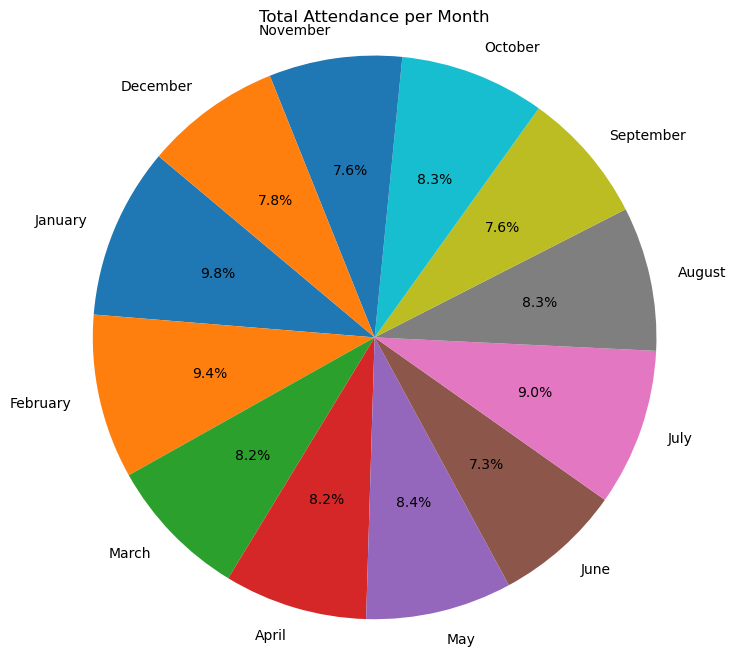

In [22]:
# Convert month numbers to words
month_names = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Add a new column for month names
polyclinicAttendancesMonthly_total_cases_per_month['Month_Name'] = polyclinicAttendancesMonthly_total_cases_per_month['Month'].apply(lambda x: month_names[x-1])

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(polyclinicAttendancesMonthly_total_cases_per_month['Total Cases'], labels=polyclinicAttendancesMonthly_total_cases_per_month['Month_Name'], autopct='%1.1f%%', startangle=140)
plt.title('Total Attendance per Month')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

### Line graph of monthly mean of surface temperature over year (surfaceTemperatureMonthlySubset)

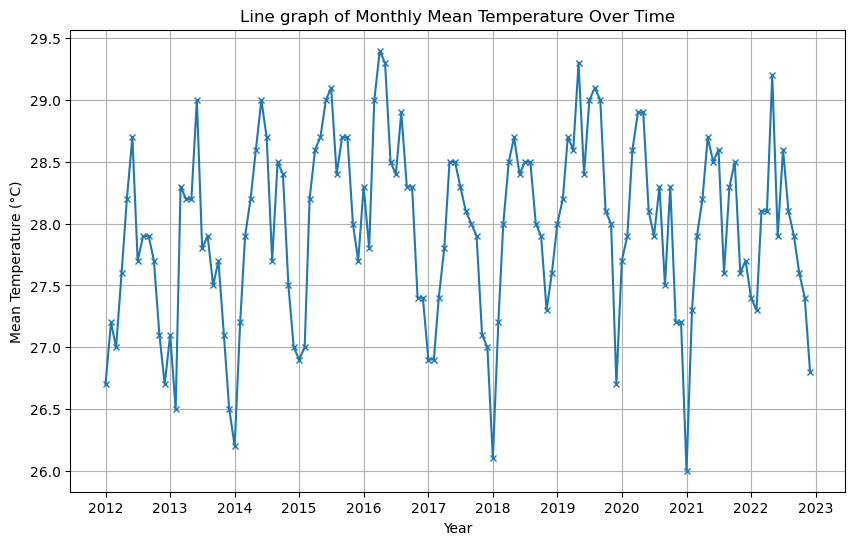

In [23]:
from matplotlib.dates import YearLocator

# Assuming you have already imported pandas as pd and have your DataFrame named surfaceTemperatureMonthlySubset

# Convert the 'month' column to PeriodDtype and then to timestamp
surfaceTemperatureMonthlySubset['month'] = pd.to_datetime(surfaceTemperatureMonthlySubset['month'].astype('str') + '-01').dt.to_period('M')

# Sort the DataFrame by the 'month' column (optional, but recommended for a line graph)
surfaceTemperatureMonthlySubset = surfaceTemperatureMonthlySubset.sort_values(by='month')

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(surfaceTemperatureMonthlySubset['month'].dt.to_timestamp(), surfaceTemperatureMonthlySubset['mean_temp'], marker='x', linestyle='-', markersize=5)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Mean Temperature (°C)')
plt.title('Line graph of Monthly Mean Temperature Over Time')

# Adding grid (optional)
plt.grid(True)

# Set the x-axis ticks to show every year
plt.gca().xaxis.set_major_locator(YearLocator())

# Show the plot
plt.show()

### Histogram of monthly total rainfall frequency over total rainfall (rainfallTotalMonthlySubset)

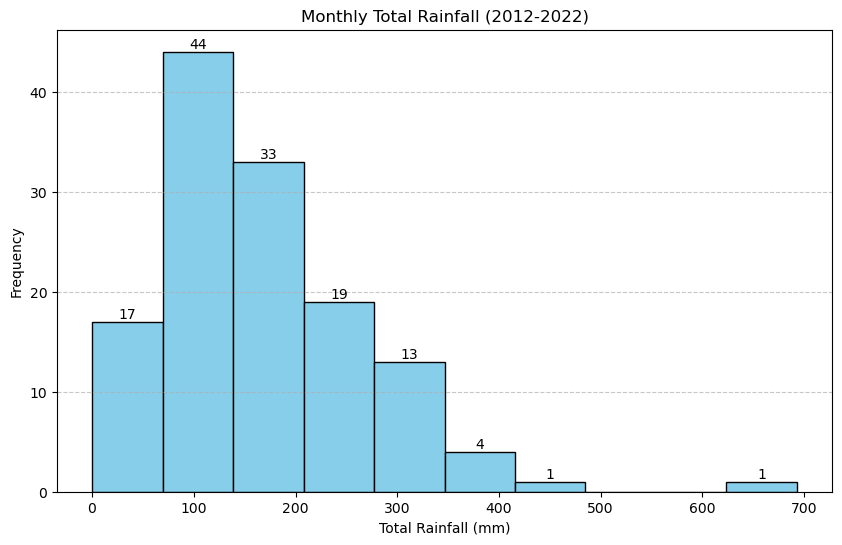

In [24]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
hist = plt.hist(rainfallTotalMonthlySubset['total_rainfall'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monthly Total Rainfall (2012-2022)')
plt.xlabel('Total Rainfall (mm)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display frequency above each non-zero bar
for i in range(len(hist[0])):
    if hist[0][i] != 0:
        plt.text(hist[1][i] + (hist[1][i + 1] - hist[1][i]) / 2, hist[0][i],
                 str(int(hist[0][i])), ha='center', va='bottom')

# Show the plot
plt.show()

### Bar graph of the mean relative humidity by month sum across all years (relativeHumidityMonthlySubset)

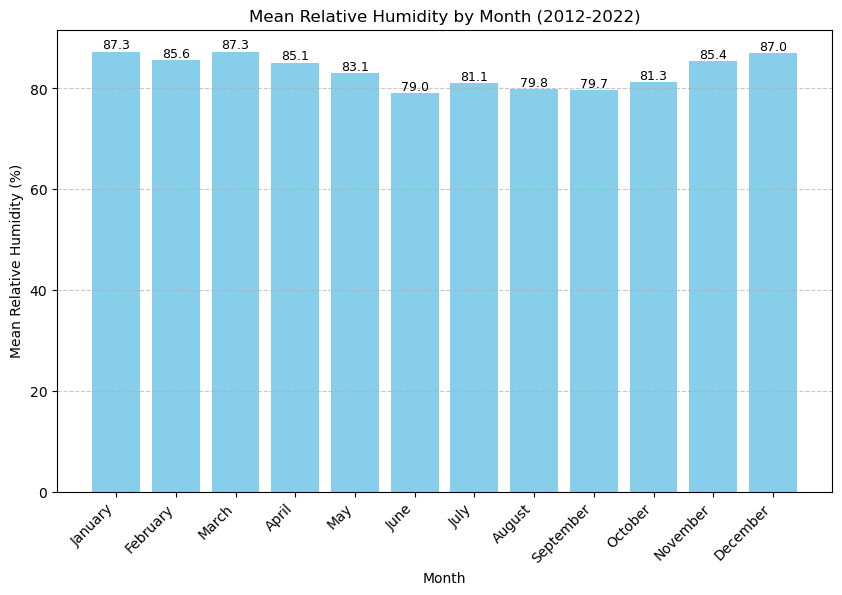

In [25]:
# Convert PeriodDtype to Timestamp and extract the month
relativeHumidityMonthlySubset['month'] = relativeHumidityMonthlySubset['month'].dt.to_timestamp()
relativeHumidityMonthlySubset['month_name'] = relativeHumidityMonthlySubset['month'].dt.strftime('%B')

# Create a bar graph
plt.figure(figsize=(10, 6))
unique_months = relativeHumidityMonthlySubset['month_name'].unique()

for month in unique_months:
    # Get the mean relative humidity for the current month
    mean_rh_value = relativeHumidityMonthlySubset.loc[relativeHumidityMonthlySubset['month_name'] == month, 'mean_rh'].values[0]

    # Plot a bar for the current month
    plt.bar(month, mean_rh_value, color='skyblue')

    # Add the mean relative humidity value above the bar
    plt.text(month, mean_rh_value, round(mean_rh_value, 2), ha='center', va='bottom', color='black', fontsize=9)

plt.xlabel('Month')
plt.ylabel('Mean Relative Humidity (%)')
plt.title('Mean Relative Humidity by Month (2012-2022)')
plt.xticks(rotation=45, ha='right')

# Add y-axis grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Box-plot of monthly mean sunshine duration (sunshineDurationMonthlySubset)

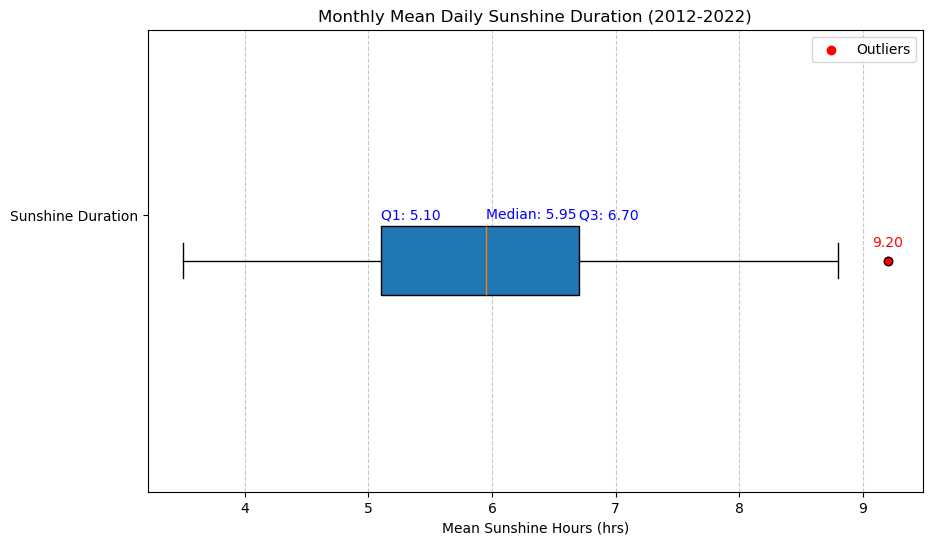

In [26]:
# Assuming you already have the 'boxplot' object from your code
plt.figure(figsize=(10, 6))
boxplot = plt.boxplot(sunshineDurationMonthlySubset['mean_sunshine_hrs'], vert=False, patch_artist=True)

# Extracting quartiles and median from the original data
data = sunshineDurationMonthlySubset['mean_sunshine_hrs']
q1 = data.quantile(0.25)
q2 = data.median()
q3 = data.quantile(0.75)

# Display quartiles and median on the plot with custom locations
plt.text(q1, 1.1, f'Q1: {q1:.2f}', verticalalignment='center', color='blue')
plt.text(q2, 1.1, f'Median: {q2:.2f}', verticalalignment='center', color='blue')
plt.text(q3, 1.1, f'Q3: {q3:.2f}', verticalalignment='center', color='blue')

# Display outliers on the plot
outliers = data[(data < q1 - 1.5 * (q3 - q1)) | (data > q3 + 1.5 * (q3 - q1))]
plt.scatter(outliers, [1] * len(outliers), color='red', marker='o', label='Outliers')

# Annotate outliers with their values
for val in outliers:
    plt.annotate(f'{val:.2f}', (val, 1), textcoords="offset points", xytext=(0,10), ha='center', color='red')

# Customize the plot
plt.title('Monthly Mean Daily Sunshine Duration (2012-2022)')
plt.xlabel('Mean Sunshine Hours (hrs)')
plt.yticks([1.1], ['Sunshine Duration'])
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()

# Show the plot
plt.show()

### Line-graph comparing polyclinic attendence to surface temperature

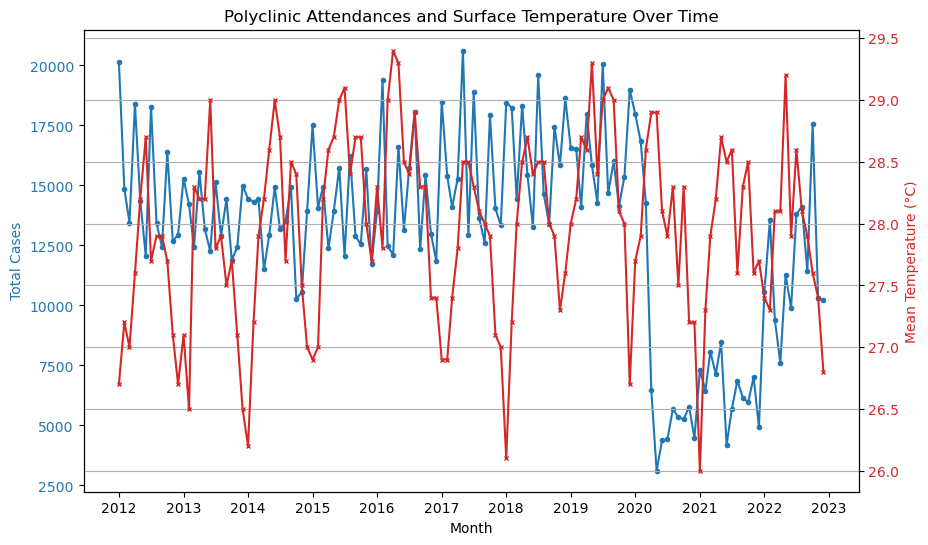

In [27]:
# Dual axis line graph for with polyclinic attendance and surface temperature
plot_dual_axis_line_graph(
    polyclinicAttendancesMonthly_total_cases_per_year_month,
    'epi_month',
    'total_cases',
    surfaceTemperatureMonthlySubset,
    'month',
    'mean_temp',
    'Polyclinic Attendances and Surface Temperature Over Time',
    color1='tab:blue',
    marker1='o',
    linestyle1='-',
    markersize1=3,
    color2='tab:red',
    marker2='x',
    linestyle2='-',
    markersize2=3,
    xlabel='Month',
    ylabel1='Total Cases',
    ylabel2='Mean Temperature (°C)'
)

### Line-graph comparing polyclinic attendence to total rainfall

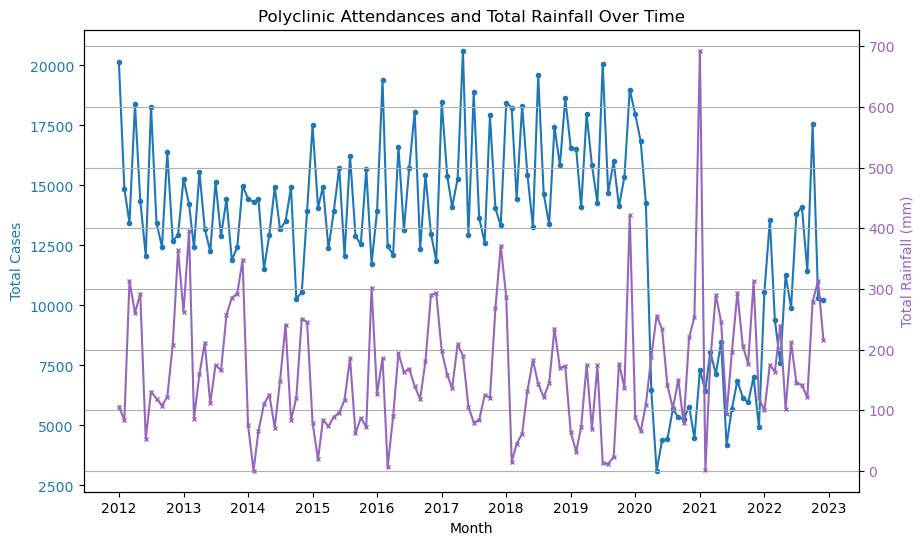

In [28]:
# Dual axis line graph for with polyclinic attendance and total rainfall
plot_dual_axis_line_graph(
    polyclinicAttendancesMonthly_total_cases_per_year_month,
    'epi_month',
    'total_cases',
    rainfallTotalMonthlySubset,
    'month',
    'total_rainfall',
    'Polyclinic Attendances and Total Rainfall Over Time',
    color1='tab:blue',
    marker1='o',
    linestyle1='-',
    markersize1=3,
    color2='tab:purple',
    marker2='x',
    linestyle2='-',
    markersize2=3,
    xlabel='Month',
    ylabel1='Total Cases',
    ylabel2='Total Rainfall (mm)'
)

### Line-graph comparing polyclinic attendence to relative humidity

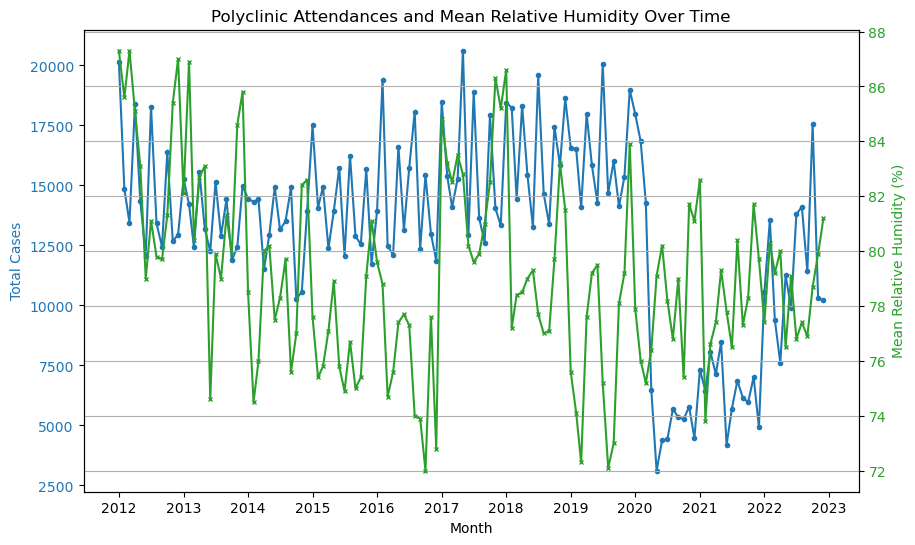

In [29]:
# Dual axis line graph for with polyclinic attendance and relative humidity
plot_dual_axis_line_graph(
    polyclinicAttendancesMonthly_total_cases_per_year_month,
    'epi_month',
    'total_cases',
    relativeHumidityMonthlySubset,
    'month',
    'mean_rh',
    'Polyclinic Attendances and Mean Relative Humidity Over Time',
    color1='tab:blue',
    marker1='o',
    linestyle1='-',
    markersize1=3,
    color2='tab:green',
    marker2='x',
    linestyle2='-',
    markersize2=3,
    xlabel='Month',
    ylabel1='Total Cases',
    ylabel2='Mean Relative Humidity (%)'
)

### Line-graph comparing polyclinic attendence to sunshine duration

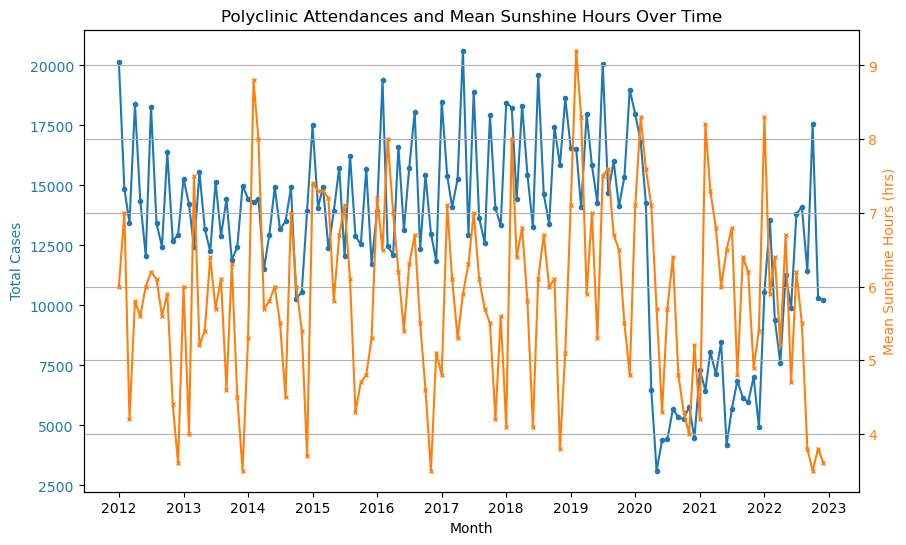

In [30]:
# Dual axis line graph for with polyclinic attendance and sunshine duration
plot_dual_axis_line_graph(
    polyclinicAttendancesMonthly_total_cases_per_year_month,
    'epi_month',
    'total_cases',
    sunshineDurationMonthlySubset,
    'month',
    'mean_sunshine_hrs',
    'Polyclinic Attendances and Mean Sunshine Hours Over Time',
    color1='tab:blue',
    marker1='o',
    linestyle1='-',
    markersize1=3,
    color2='tab:orange',
    marker2='x',
    linestyle2='-',
    markersize2=3,
    xlabel='Month',
    ylabel1='Total Cases',
    ylabel2='Mean Sunshine Hours (hrs)'
)

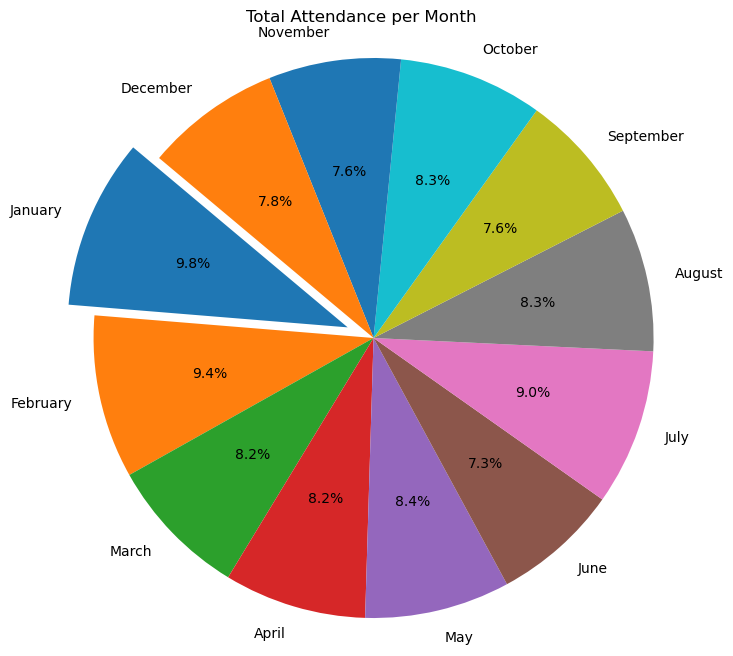

In [31]:
# Your month names list
month_names = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Assuming you have a DataFrame named polyclinicAttendancesMonthly_total_cases_per_month with columns 'Month' and 'Total Cases'

# Add a new column for month names
polyclinicAttendancesMonthly_total_cases_per_month['Month_Name'] = polyclinicAttendancesMonthly_total_cases_per_month['Month'].apply(lambda x: month_names[x-1])

# Plot the pie chart with exploded January
explode = [0.1 if month == 'January' else 0 for month in polyclinicAttendancesMonthly_total_cases_per_month['Month_Name']]

plt.figure(figsize=(8, 8))
plt.pie(polyclinicAttendancesMonthly_total_cases_per_month['Total Cases'], labels=polyclinicAttendancesMonthly_total_cases_per_month['Month_Name'], autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Total Attendance per Month')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()